<a href="https://colab.research.google.com/github/Renaldinho/ML-ImageClassification/blob/main/mlp_training_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install keras-tuner

In [2]:
import torch
import torchvision

In [3]:
train_dataset = torchvision.datasets.EMNIST(
    root='./data',
    split='digits',
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor()
)

test_dataset = torchvision.datasets.EMNIST(
    root='./data',
    split='digits',
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor()
)





Data flattening and split

In [4]:
from sklearn.model_selection import train_test_split
import numpy as np

traning_images = np.array([data[0].numpy() for data in train_dataset])
training_labels = np.array([data[1] for data in train_dataset])
traning_images = traning_images.reshape(240000, 784)

test_images = np.array([data[0].numpy() for data in test_dataset])
test_labels = np.array([data[1] for data in test_dataset])
test_images = test_images.reshape(40000, 784)

x_train, x_validation, y_train, y_validation = train_test_split(traning_images, training_labels, test_size=0.2, random_state=42)




In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_validation.shape)
print(y_validation.shape)

print(test_images.shape)
print(test_labels.shape)

(192000, 784)
(192000,)
(48000, 784)
(48000,)
(40000, 784)
(40000,)


In [6]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential(
    [
        Dense(768, activation='relu'),
        Dense(10, activation='softmax')
    ]
)

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [7]:
training = model.fit(x_train, y_train, epochs=10, validation_data=(x_validation, y_validation))

Epoch 1/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 66s 11ms/step - accuracy: 0.9502 - loss: 0.1710 - val_accuracy: 0.9835 - val_loss: 0.0577
Epoch 2/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 82s 11ms/step - accuracy: 0.9854 - loss: 0.0476 - val_accuracy: 0.9860 - val_loss: 0.0498
Epoch 3/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 81s 10ms/step - accuracy: 0.9900 - loss: 0.0336 - val_accuracy: 0.9856 - val_loss: 0.0518
Epoch 4/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 88s 11ms/step - accuracy: 0.9919 - loss: 0.0271 - val_accuracy: 0.9849 - val_loss: 0.0625
Epoch 5/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 80s 11ms/step - accuracy: 0.9927 - loss: 0.0230 - val_accuracy: 0.9858 - val_loss: 0.0572
Epoch 6/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 64s 11ms/step - accuracy: 0.9940 - loss: 0.0205 - val_accuracy: 0.9871 - val_loss: 0.0609
Epoch 7/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 65s 11ms/step - accuracy: 0.9945 - loss: 0.0182 - val_accuracy: 0.9860 - val_loss: 0.0666
Epoch 8/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 65s 11ms/step - accuracy: 0.9954 -

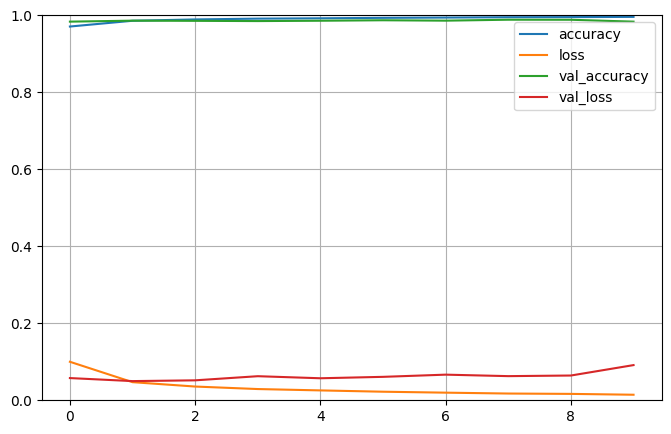

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(training.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step


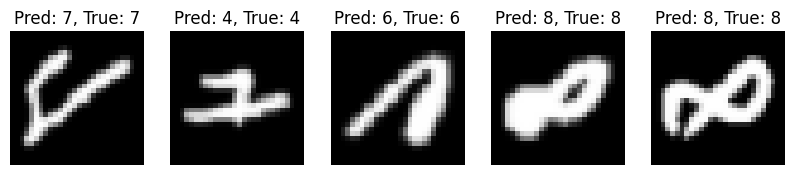

In [9]:
y_pred = model.predict(test_images)

y_pred_labels = np.argmax(y_pred, axis=1)

num_samples = 5
sample_indices = np.random.choice(len(test_images), num_samples, replace=False)

plt.figure(figsize=(10, 5))
for i, idx in enumerate(sample_indices):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(test_images[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {y_pred_labels[idx]}, True: {test_labels[idx]}")
    plt.axis('off')
plt.show()

In [10]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, y_pred_labels))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4000
           1       1.00      0.99      0.99      4000
           2       0.99      0.98      0.99      4000
           3       0.96      0.99      0.98      4000
           4       0.99      0.99      0.99      4000
           5       0.99      0.96      0.98      4000
           6       0.99      0.99      0.99      4000
           7       0.99      0.99      0.99      4000
           8       0.97      0.98      0.97      4000
           9       0.98      0.99      0.98      4000

    accuracy                           0.99     40000
   macro avg       0.99      0.99      0.99     40000
weighted avg       0.99      0.99      0.99     40000



In [11]:
report = classification_report(test_labels, y_pred_labels, output_dict=True)

average_precision = report['macro avg']['precision']
average_recall = report['macro avg']['recall']
average_f1 = report['macro avg']['f1-score']

print(f"Average Precision: {average_precision:.3f}")
print(f"Average Recall: {average_recall:.3f}")
print(f"Average F1-score: {average_f1:.3f}")

Average Precision: 0.986
Average Recall: 0.985
Average F1-score: 0.986


In [12]:
model.evaluate(test_images, test_labels)

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9844 - loss: 0.0874


[0.07911883294582367, 0.9854999780654907]

In [13]:
%pip install keras-tuner

In [14]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD

def build_model(hp):
  n_hidden = hp.Int('n_hidden', min_value=1, max_value=10)
  n_neurons = hp.Int('n_neurons', min_value=16, max_value=256, step=16)
  learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')

  model = keras.Sequential()
  model.add(Dense(768, activation='relu'))
  for _ in range(n_hidden):
    model.add(Dense(n_neurons, activation='relu'))

  model.add(Dense(10, activation='softmax'))

  optimizer = SGD(learning_rate=learning_rate)
  model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  return model



In [15]:

from kerastuner.tuners import RandomSearch
from tensorflow.keras.callbacks import EarlyStopping

!rm -rf randomsearch_digit_classification_tuning

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='randomsearch_digit_classification_tuning'
)

early_stopping = EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True)

tuner.search(x_train, y_train, epochs=10, validation_data=(x_validation, y_validation), callbacks=[early_stopping])

best_model = tuner.get_best_models(num_models=1)[0]

Trial 10 Complete [00h 11m 39s]
val_accuracy: 0.981416642665863

Best val_accuracy So Far: 0.981416642665863
Total elapsed time: 02h 02m 11s


In [17]:
from kerastuner.tuners import Hyperband

!rm -rf hyperband_digit_classification_tuning

tuner = Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='hyperband_digit_classification_tuning',
)

stop_early = EarlyStopping(monitor='val_loss', patience=1)

tuner.search(x_train, y_train, epochs=10, validation_data=(x_validation, y_validation),
              callbacks=[stop_early])

# Get the best model
best_model_hyperband = tuner.get_best_models(num_models=1)[0]

Trial 30 Complete [00h 13m 10s]
val_accuracy: 0.9616666436195374

Best val_accuracy So Far: 0.9863125085830688
Total elapsed time: 02h 17m 18s
